In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
train_path = '/content/drive/MyDrive/Covid19_Minor_Project/CovidDataset/Train'
val_path = '/content/drive/MyDrive/Covid19_Minor_Project/CovidDataset/Val'

In [ ]:
classes=["Covid",  "Normal"]

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.3,
                                   preprocessing_function=preprocess_input) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory(train_path,
                                                     target_size=(224,224),
                                                     batch_size=64,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training',
                                                     classes=classes)

In [ ]:
validation_datagen = ImageDataGenerator(validation_split=0.3,
                                        preprocessing_function=preprocess_input)

validation_generator =  validation_datagen.flow_from_directory(val_path,
                                                                target_size=(224,224),
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                subset='validation',
                                                               classes=classes) 

In [ ]:
model_res50 = Sequential()

model_res50.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet'
    ))

model_res50.add(Dense(2, activation='softmax'))

model_res50.layers[0].trainable = False 


94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
model_res50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)

In [ ]:
model_res50.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
callbacks=myCallback()

In [ ]:
fit_history = model_res50.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    validation_steps=steps_per_epoch_validation,
    epochs=10,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
6/6 [==============================] - 268s 51s/step - loss: 0.7306 - accuracy: 0.6057 - val_loss: 0.2496 - val_accuracy: 0.9375
Epoch 2/10
6/6 [==============================] - 62s 10s/step - loss: 0.5060 - accuracy: 0.7537 - val_loss: 0.1667 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 62s 10s/step - loss: 0.3881 - accuracy: 0.8111 - val_loss: 0.1134 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 62s 11s/step - loss: 0.2799 - accuracy: 0.8860 - val_loss: 0.1238 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 61s 11s/step - loss: 0.2667 - accuracy: 0.8753 - val_loss: 0.1190 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 62s 10s/step - loss: 0.2095 - accuracy: 0.9328 - val_loss: 0.1345 - val_accuracy: 0.9688
Epoch 7/10
6/6 [==============================] - 62s 10s/step - loss: 0.2294 - accuracy: 0.8982 - val_loss: 0.1218 - val_accuracy: 0.9688
Epoch 8/10
6/6 [==========

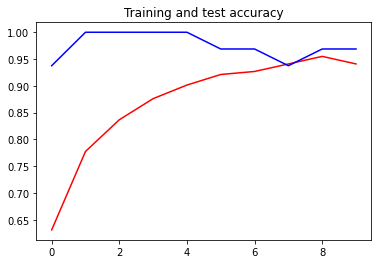

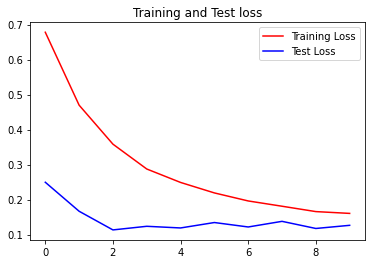

In [ ]:
import matplotlib.pyplot as plt

acc = fit_history.history['accuracy']
val_acc = fit_history.history['val_accuracy']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.title('Training and test accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Test Loss')
plt.title('Training and Test loss')

plt.legend()

plt.show()

In [ ]:
model_res50.save('ResNet50_model.h5')

In [ ]:
model_res50.evaluate(train_generator)

6/6 [==============================] - 56s 9s/step - loss: 0.1410 - accuracy: 0.9634


[0.14097438752651215, 0.9633802771568298]

In [ ]:
test_path='/content/drive/MyDrive/Copy_Final_Project/Dataset/Test'

In [ ]:
test_datagen = ImageDataGenerator(validation_split=0.3,
                                        preprocessing_function=preprocess_input)

test_generator =  test_datagen.flow_from_directory(test_path,
                                                                target_size=(224,224),
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                        
                                                               classes=classes) 

Found 509 images belonging to 2 classes.


In [ ]:
model_res50.evaluate(test_generator)

8/8 [==============================] - 297s 41s/step - loss: 0.2210 - accuracy: 0.9234


[0.22098921239376068, 0.9233791828155518]

In [ ]:
import matplotlib.pyplot as plt
import itertools 

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model_res50.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix model')

Confusion Matrix model


Confusion matrix, without normalization


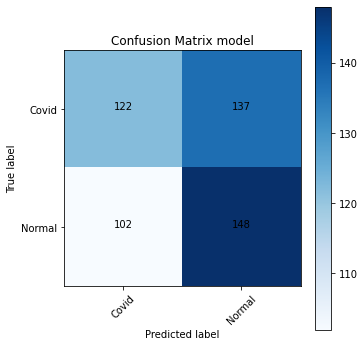

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)
# plot_confusion_matrix(cm, classes, title='Confusion Matrix model')
plot_confusion_matrix(cm, classes,False, title='Confusion Matrix model')

In [ ]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("Precision =",precision_score(test_generator.classes,y_pred))
print("Recall =",recall_score(test_generator.classes,y_pred))
print("F1 Score =",f1_score(test_generator.classes,y_pred))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))
print("Specificity = ",conf_specificity)

Precision = 0.519298245614035
Recall = 0.592
F1 Score = 0.5532710280373832
Specificity =  0.47104247104247104
